In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from math import pow
plt.style.use('ggplot')

np.random.seed(1)

In [2]:
N = 64
unknows = N-1
x = np.linspace(0, 1, endpoint=True, num=N+1)

0.015625 0.015625


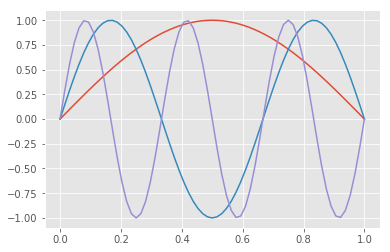

In [3]:

print x[1], 1.0/N
for k in [1, 3, 6]:
    plt.plot(x, np.sin(x*k*np.pi))

In [4]:
def operador(N):
    A = np.zeros((N, N))
    for i in range(N):
        A[i][i] = 2.0
        if i > 0: 
            A[i][i-1] = -1.0
        if i < N-1:
            A[i][i+1] = -1.0
    return A


def GS_Vetor(u, r):
    h = 1.0/(len(u)-1)
    for i in range(1, len(u) - 1):
        u[i] = 0.5*(h*h*r[i] + u[i-1] + u[i+1])
        
        
def Jacobi(u, u_ant, f):
    for i in range(1, len(u) - 1):
        u[i] = 0.5*(h*h*f(i*h) + u_ant[i-1] + u_ant[i+1])    
                             

def Weighted_Jacobi(u, u_ant, w):
    I = np.identity(unknows)
    A = operador(unknows)
    D = np.diag(np.diag(A))
    L = -np.tril(A, k=-1)
    U = -np.triu(A, k=1)   
    Rj = w*np.dot(LA.inv(D), L + U)
    Rw = (1-w)*I + w*Rj
    erros = []
    erros.append(LA.norm(u_ant, ord=np.inf))
    
    iteracoes = 0
    while iteracoes < 100:
        Weighted_Jacobi_Step(u[1:-1], u_ant[1:-1], Rw, w)
        Weighted_Jacobi_Step(u_ant[1:-1], u[1:-1], Rw,w)

        iteracoes += 2
        erros.append(LA.norm(u_ant, ord=np.inf))
    
    return erros, iteracoes


def Weighted_Jacobi_Step(u, u_ant, Rw, w, f=lambda x: 0.0):
    #u[:] = np.dot(Rw, u_ant)
    for i in xrange(len(u)):
        u[i] = (1-w)*u_ant[i]
        if i > 0:
            u[i] += (w/2.0)*u_ant[i-1]
        if i < len(u)-1:
            u[i] += (w/2.0)*u_ant[i+1]

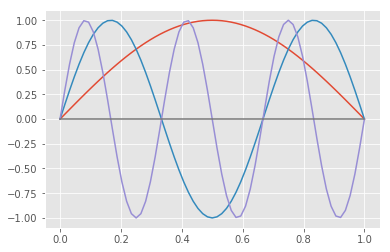

In [5]:
u = 2*(np.random.rand(N+1) - 0.5)
u[0]=u[-1]=0.0


u0 = np.sin(x*np.pi)
u1 = np.sin(3*x*np.pi)
u2 = np.sin(6*x*np.pi)
u3 = (1.0/3)*(u0 + u1 + u2)

plt.plot(x, u0)
plt.plot(x, u1)
plt.plot(x, u2)
plt.plot(x, np.zeros(N+1))


100


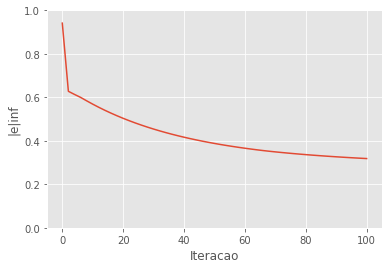

In [11]:

w = 2.0/3
u3 = (1.0/3)*( np.sin(x*np.pi) +  np.sin(6*x*np.pi) +  np.sin(32*x*np.pi))
u_ant = np.copy(u3)
erros, iteracoes = Weighted_Jacobi(u, u_ant, w)  
print iteracoes


plt.plot(range(0,iteracoes+1,2), erros)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.0,1.0))
plt.xlabel("Iteracao")
plt.ylabel("|e|inf")

(-5.0, 105.0, 0.0, 1.05)

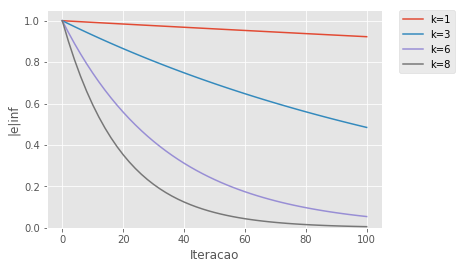

In [14]:
w = 2.0/3.0

for k in [1, 3, 6, 8]:
    u_ant = np.sin(k*np.pi*x)
    erros, iteracoes = Weighted_Jacobi(u, u_ant, w)  
    plt.plot(range(0,iteracoes+1,2), erros, label="k=%d"%k)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('|e|inf')
plt.xlabel('Iteracao')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.0,1.05))


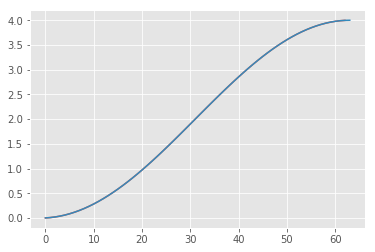

In [9]:
A = operador(N-1)
lambdas, vs = LA.eig(A)

a = zip(lambdas, range(N-1))

a.sort()
#print a
#lambdas.sort()
lambdas, ord = zip(*a)



plt.plot(lambdas)
plt.plot(4*np.power(np.sin(x[1:]*np.pi/2), 2))

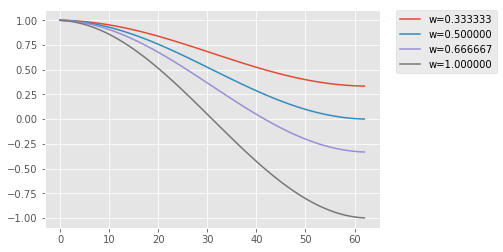

In [17]:
for w in [1.0/3, 1.0/2, 2.0/3, 1]:
    plt.plot(1-2*w*np.power(np.sin(x[1:-1]*np.pi/2),2), label="w=%f"%w)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Gauss - Seidel

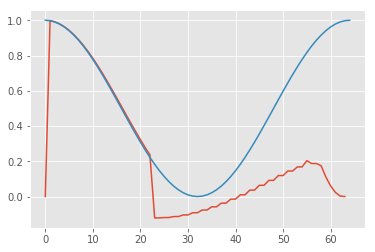

In [44]:
A = operador(N)
D = np.diag(np.diag(A))
L = -np.tril(A, k=-1)
U = -np.triu(A, k=1)   





Rg = LA.inv(np.tril(A))
Rg = np.dot(Rg, U)

lambdas, vs = LA.eig(Rg)


plt.plot(lambdas)

plt.plot(np.power(np.cos(x*np.pi),2))

In [46]:
for i in range(len(lambdas)):
    print "%d -> %f" % (i, lambdas[i])

0 -> 0.000000
1 -> 0.997666
2 -> 0.990685
3 -> 0.979123
4 -> 0.963087
5 -> 0.942728
6 -> 0.918235
7 -> 0.889837
8 -> 0.857799
9 -> 0.822421
10 -> 0.784032
11 -> 0.742992
12 -> 0.699682
13 -> 0.654508
14 -> 0.607892
15 -> 0.560268
16 -> 0.512082
17 -> 0.463783
18 -> 0.415821
19 -> 0.368646
20 -> 0.322698
21 -> 0.278403
22 -> 0.236124
23 -> -0.121312
24 -> -0.121312
25 -> -0.119063
26 -> -0.119063
27 -> -0.113575
28 -> -0.113575
29 -> -0.104472
30 -> -0.104472
31 -> -0.091956
32 -> -0.091956
33 -> -0.076430
34 -> -0.076430
35 -> -0.058269
36 -> -0.058269
37 -> -0.037700
38 -> -0.037700
39 -> -0.014877
40 -> -0.014877
41 -> 0.009947
42 -> 0.009947
43 -> 0.036364
44 -> 0.036364
45 -> 0.063819
46 -> 0.063819
47 -> 0.091626
48 -> 0.091626
49 -> 0.118951
50 -> 0.118951
51 -> 0.144805
52 -> 0.144805
53 -> 0.168006
54 -> 0.168006
55 -> 0.203435
56 -> 0.187271
57 -> 0.187271
58 -> 0.174593
59 -> 0.110847
60 -> 0.060073
61 -> 0.023492
62 -> 0.002777
63 -> -0.000000


/home/mateus/Development/multigrid/mg_env/lib/python2.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
